# Class Notes for 5/17 #

## Working with Seaborn ##

The seaborn library is very analogous to ggplot.  It operates at a higher level and allows you to produce elegant graphics with little effort.  It is described [at its homepage](https://seaborn.pydata.org/) and can be installed with 'pip install seaborn'. 

Additional information can be found [on this page](https://seaborn.pydata.org/tutorial.html). 

In [22]:
import seaborn as sns
import pandas as pd

In [23]:
mydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/STAT223-S24/main/Data/firstdaydata.csv")

In [24]:
mydata.head(5)

,randnum,diehard,earlobes,hitchthumb,age,siblings,pizzatop,knoxyear,eyecolor,cellphone,hand,gender,height,wingspan,cubit,handspan
0,7,Yes,Detached,Hitchhikers thumb,19,1,Pepperoni,Sophomore,Brown,Android,Right,Female,66.0,67.1,17.5,7.5
1,7,Yes,Attached,Hitchhikers thumb,21,0,Cheese,Senior and beyond,Brown,Android,Left,Female,64.5,68.0,18.0,6.5
2,9,No,Detached,No hitchhikers thumb,19,2,Cheese,Sophomore,Brown,Android,Right,Male,73.0,71.0,18.5,7.5
3,3,No,Detached,No hitchhikers thumb,19,0,Cheese,Sophomore,Other,Android,Right,Male,67.0,69.1,18.4,7.9
4,4,Yes,Detached,No hitchhikers thumb,20,1,Sausage,Junior,Brown,Android,Right,Female,64.8,61.2,16.0,6.6


<AxesSubplot: xlabel='wingspan', ylabel='height'>

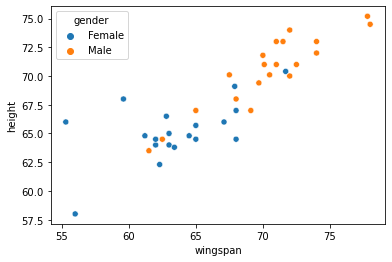

In [25]:
sns.scatterplot(data=mydata, x="wingspan",y="height", hue="gender")

<AxesSubplot: xlabel='wingspan', ylabel='gender'>

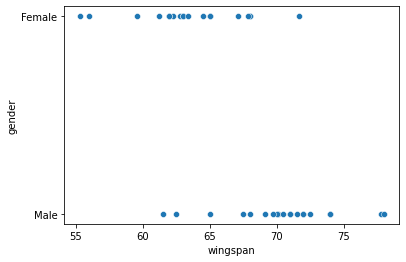

In [26]:
sns.scatterplot(data=mydata,x="wingspan",y="gender")

<AxesSubplot: xlabel='wingspan', ylabel='Count'>

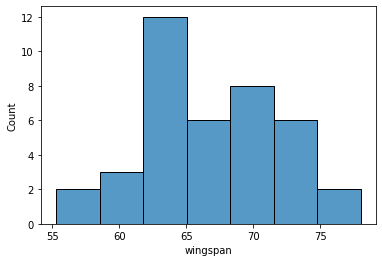

In [27]:
sns.histplot(data=mydata, x="wingspan")

<AxesSubplot: xlabel='wingspan', ylabel='Count'>

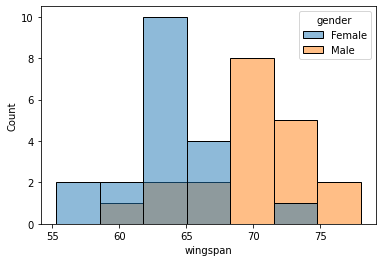

In [28]:
sns.histplot(data=mydata, x="wingspan", hue="gender")

# A Classification Problem #

**Example:** The [iris dataset](https://archive.ics.uci.edu/dataset/53/iris) is well-known in data science. The goal below is to classify the type of iris on the basis of the four quantative variables--pedal and sepal length and width. 

## Loading the data ##

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [31]:
X, y = load_iris(return_X_y=True)

In [32]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## The Train-Test Split ##

The [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is very important in SKLearn.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 4)
(75,)
(75, 4)
(75,)


## Naive Bayes Gaussian Classifier ##

For this data set we use the *Gaussian* naive Bayes classifier because the input variables are continuous. See [this page](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).


In [37]:
gnb = GaussianNB()

In [38]:
mymodel = gnb.fit(X_train, y_train)

In [39]:
y_pred = mymodel.predict(X_test)

In [40]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

## Accuracy Measures ##

For categorical data, you can't use SSE.  (Why not?)  You also have to avoid the problem of overfitting.  (Why?) Therefore, you set up a train-test split and then measure the model performance in some way.  There are [many ways to measure model performance](https://www.edlitera.com/en/blog/posts/evaluating-classification-models) (see also [this page](https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02)) and SKLearn has [many many ways to find and display most of them](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).  Here are some approaches:

+ Accuracy: the proportion of correctly classified examples over the whole set of examples.
+ Confusion matrix: shows what got misclassified where

For *binary classification* there are even more ways:

+ TP, TN, FP, FN
+ Precision: the number of true positives divided by the sum of true and false positives.
+ Sensitivity/Recall (TPR): the number of true positives divided by the sum of true positives and false negatives
+ Specificity/Selectivity: the proportion of true negative cases which were correctly identified as such
+ Fall-out (FPR): the proportion of actual negative cases that were incorrectly classified as positive
+ (etc--see the link above)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.9466666666666667

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, y_pred)

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

## Logistic Regression Classifier ##

The discussion is [at this URL](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [44]:
from sklearn.linear_model import LogisticRegression

In [23]:
mylogmodel = LogisticRegression()

In [25]:
myfit = mylogmodel.fit(X_train, y_train)

In [26]:
logy_pred = myfit.predict(X_test)

**Note:** The LogisticRegression classifier automatically figures out how to deal with multinomial data.  See [the SKLearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [27]:
accuracy_score(logy_pred, y_test)

0.9333333333333333

In [28]:
confusion_matrix(logy_pred, y_test)

array([[21,  0,  0],
       [ 0, 29,  4],
       [ 0,  1, 20]])

## A Deeper Understanding of Model Outcomes ##

Logistic regression (along with the one vs. rest) predicts probabilities and makes decisions on the basis of highest probabilities. You can also see the probabilities of success for each category for each feature vector using ".predict_proba".  This allows you to determine 'how close' the decision was for the model. 

In [33]:
myfit.predict_proba(X_test)

array([[6.22898993e-04, 1.46906360e-01, 8.52470741e-01],
       [1.82444804e-02, 9.60316059e-01, 2.14394608e-02],
       [9.87917806e-01, 1.20800336e-02, 2.16046147e-06],
       [9.58828281e-06, 4.90681957e-02, 9.50922216e-01],
       [9.69142573e-01, 3.08541623e-02, 3.26502440e-06],
       [1.50821406e-05, 1.45939581e-02, 9.85390960e-01],
       [9.81019072e-01, 1.89791343e-02, 1.79329111e-06],
       [5.97745417e-03, 6.43091972e-01, 3.50930573e-01],
       [3.41235710e-03, 7.08593527e-01, 2.87994116e-01],
       [3.41718117e-02, 9.01726743e-01, 6.41014457e-02],
       [4.56607726e-04, 3.54400925e-01, 6.45142467e-01],
       [1.35719653e-02, 6.97739888e-01, 2.88688147e-01],
       [8.09593151e-03, 7.98768806e-01, 1.93135263e-01],
       [6.32827616e-03, 7.41749503e-01, 2.51922221e-01],
       [7.87554898e-03, 7.12012548e-01, 2.80111903e-01],
       [9.82316148e-01, 1.76823082e-02, 1.54408027e-06],
       [1.26895049e-02, 7.46835301e-01, 2.40475194e-01],
       [1.84015372e-02, 8.80126

## A Simple Example of Logistic Regression ##

In [41]:
mydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/STAT223-S24/main/Data/firstdaydata.csv")

In [42]:
mydata.head(5)

,randnum,diehard,earlobes,hitchthumb,age,siblings,pizzatop,knoxyear,eyecolor,cellphone,hand,gender,height,wingspan,cubit,handspan
0,7,Yes,Detached,Hitchhikers thumb,19,1,Pepperoni,Sophomore,Brown,Android,Right,Female,66.0,67.1,17.5,7.5
1,7,Yes,Attached,Hitchhikers thumb,21,0,Cheese,Senior and beyond,Brown,Android,Left,Female,64.5,68.0,18.0,6.5
2,9,No,Detached,No hitchhikers thumb,19,2,Cheese,Sophomore,Brown,Android,Right,Male,73.0,71.0,18.5,7.5
3,3,No,Detached,No hitchhikers thumb,19,0,Cheese,Sophomore,Other,Android,Right,Male,67.0,69.1,18.4,7.9
4,4,Yes,Detached,No hitchhikers thumb,20,1,Sausage,Junior,Brown,Android,Right,Female,64.8,61.2,16.0,6.6


In [45]:
mylogreg = LogisticRegression()

In [48]:
mydata["wingspan"].shape  # wrong shape!  Need (39,1)

(39,)

In [49]:
mydata["wingspan"].values.reshape(39,1).shape

(39, 1)

In [50]:
myX = mydata["wingspan"].values.reshape(39,1)

In [52]:
mydata["gender"].head(3)

0    Female
1    Female
2      Male
Name: gender, dtype: object

In [53]:
mydata["gender"].shape

(39,)

In [54]:
myy = mydata["gender"]

In [55]:
mymodel = mylogreg.fit(myX, myy)  

In [58]:
mypredict = mymodel.predict(myX)  # No time to do a train-test split

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(mypredict, myy)

0.7948717948717948

Wow, that's pretty bad . . . . but the data was kind of sketchy (see the scatterplots above)